In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.integrate
from astropy.table import Table, join
import healpy
from clmm import Cosmology
import pyccl as ccl
import clmm

In [2]:
import pickle,sys

def load(filename, **kwargs):
    """Loads GalaxyCluster object to filename using Pickle"""
    with open(filename, 'rb') as fin:
        return pickle.load(fin, **kwargs)


In [3]:
Om_list = np.linspace(0.1, 0.6, 30)
w_list = np.linspace(-2.5, -0.5, 30)

In [4]:
individual_profiles = load('/pbs/throng/lsst/users/cpayerne/CLCosmo_Sim_database/data_vary_fuducial_cosmology/ind_profile_redmapper.pkl')

In [5]:
print(individual_profiles.colnames)

['id', 'ra', 'dec', 'z', 'richness', 'Om0_DSt', 'Om0_DSx', 'Om0_W_l', 'Om0_radius', 'Om1_DSt', 'Om1_DSx', 'Om1_W_l', 'Om1_radius', 'Om2_DSt', 'Om2_DSx', 'Om2_W_l', 'Om2_radius', 'Om3_DSt', 'Om3_DSx', 'Om3_W_l', 'Om3_radius', 'Om4_DSt', 'Om4_DSx', 'Om4_W_l', 'Om4_radius', 'Om5_DSt', 'Om5_DSx', 'Om5_W_l', 'Om5_radius', 'Om6_DSt', 'Om6_DSx', 'Om6_W_l', 'Om6_radius', 'Om7_DSt', 'Om7_DSx', 'Om7_W_l', 'Om7_radius', 'Om8_DSt', 'Om8_DSx', 'Om8_W_l', 'Om8_radius', 'Om9_DSt', 'Om9_DSx', 'Om9_W_l', 'Om9_radius', 'Om10_DSt', 'Om10_DSx', 'Om10_W_l', 'Om10_radius', 'Om11_DSt', 'Om11_DSx', 'Om11_W_l', 'Om11_radius', 'Om12_DSt', 'Om12_DSx', 'Om12_W_l', 'Om12_radius', 'Om13_DSt', 'Om13_DSx', 'Om13_W_l', 'Om13_radius', 'Om14_DSt', 'Om14_DSx', 'Om14_W_l', 'Om14_radius', 'Om15_DSt', 'Om15_DSx', 'Om15_W_l', 'Om15_radius', 'Om16_DSt', 'Om16_DSx', 'Om16_W_l', 'Om16_radius', 'Om17_DSt', 'Om17_DSx', 'Om17_W_l', 'Om17_radius', 'Om18_DSt', 'Om18_DSx', 'Om18_W_l', 'Om18_radius', 'Om19_DSt', 'Om19_DSx', 'Om19_W_l'

Text(0, 0.5, 'DSt')

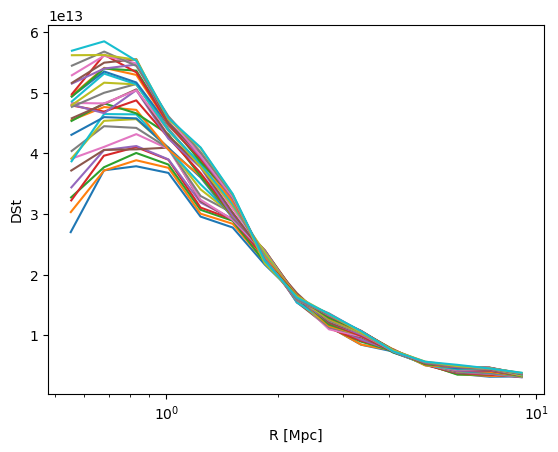

In [6]:
for i, Om_ in enumerate(np.linspace(0.1, 0.6, 30)):

    plt.plot(np.mean(individual_profiles[f'Om{i}_radius'], axis=0), np.mean(individual_profiles[f'Om{i}_DSt'], axis=0))
plt.xscale('log')
plt.xlabel('R [Mpc]')
plt.ylabel('DSt')

In [7]:
stacked_profiles_Om = load('/pbs/throng/lsst/users/cpayerne/CLCosmo_Sim_database/data_vary_fuducial_cosmology/stacked_esd_profiles_redmapper_vary_Omega_m.pkl')
stacked_profiles_wDE = load('/pbs/throng/lsst/users/cpayerne/CLCosmo_Sim_database/data_vary_fuducial_cosmology/stacked_esd_profiles_redmapper_vary_wDE.pkl')

In [8]:
print(stacked_profiles_Om.keys())

dict_keys(['Om0_stacked_profile', 'Om0_stacked_covariance', 'Om1_stacked_profile', 'Om1_stacked_covariance', 'Om2_stacked_profile', 'Om2_stacked_covariance', 'Om3_stacked_profile', 'Om3_stacked_covariance', 'Om4_stacked_profile', 'Om4_stacked_covariance', 'Om5_stacked_profile', 'Om5_stacked_covariance', 'Om6_stacked_profile', 'Om6_stacked_covariance', 'Om7_stacked_profile', 'Om7_stacked_covariance', 'Om8_stacked_profile', 'Om8_stacked_covariance', 'Om9_stacked_profile', 'Om9_stacked_covariance', 'Om10_stacked_profile', 'Om10_stacked_covariance', 'Om11_stacked_profile', 'Om11_stacked_covariance', 'Om12_stacked_profile', 'Om12_stacked_covariance', 'Om13_stacked_profile', 'Om13_stacked_covariance', 'Om14_stacked_profile', 'Om14_stacked_covariance', 'Om15_stacked_profile', 'Om15_stacked_covariance', 'Om16_stacked_profile', 'Om16_stacked_covariance', 'Om17_stacked_profile', 'Om17_stacked_covariance', 'Om18_stacked_profile', 'Om18_stacked_covariance', 'Om19_stacked_profile', 'Om19_stacked_co

In [9]:
profile_Om0 = stacked_profiles_Om['Om0_stacked_profile']
profile_w0 = stacked_profiles_wDE['w0_stacked_profile']

In [10]:
print(profile_Om0.colnames)

['z_mean', 'obs_mean', 'obs_rms', 'radius', 'DSt', 'DSx', 'gt_individual', 'radius_individual', 'n_stack', 'cluster_id', 'z_individual', 'obs_individual', 'z_bin', 'obs_bin', 'Om0_W_l', 'richness', 'z']


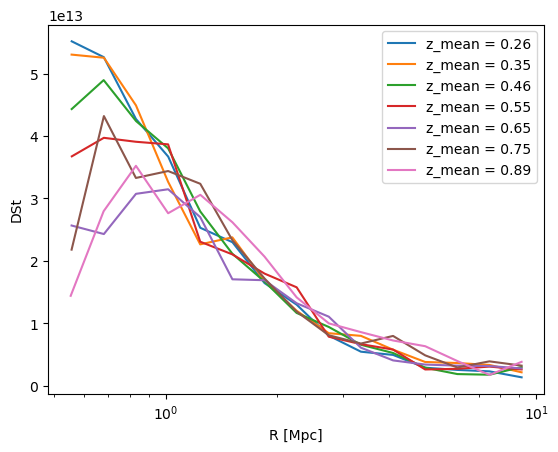

In [11]:
mask = (profile_Om0['obs_mean'] > 20) * (profile_Om0['obs_mean'] < 30)
profile_first_richness_bin = profile_Om0[mask]
for p in profile_first_richness_bin:
    z_mean = p['z_mean']
    plt.plot(p['radius'], p['DSt'], label = f'z_mean = {z_mean:.2f}' )
plt.xscale('log')
plt.xlabel('R [Mpc]')
plt.ylabel('DSt')
plt.legend()